In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive to google coalb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path= "/content/drive/MyDrive/Book Recommendation System -Rohit Madame/Books.csv"
file_path1="/content/drive/MyDrive/Book Recommendation System -Rohit Madame/Ratings.csv"
file_path2="/content/drive/MyDrive/Book Recommendation System -Rohit Madame/Users.csv"

In [ ]:
book_df=pd.read_csv(file_path)

In [ ]:
rating_df=pd.read_csv(file_path1)

In [ ]:
user_df=pd.read_csv(file_path2)

In [ ]:
print(f'The shape for book data is {book_df.shape}')
print(f'The shape for user data is {user_df.shape}')
print(f'The shape for ratings data is {rating_df.shape}')

The shape for book data is (271360, 8)
The shape for user data is (278858, 3)
The shape for ratings data is (1149780, 3)


In [ ]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Renaming column name of 'books', 'users' & 'ratings' dataset
book_df.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
user_df.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
rating_df.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [ ]:
book_df.drop(['Image-URL-S',	'Image-URL-M',	'Image-URL-L'],axis=1,inplace=True)

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   title      271360 non-null  object
 2   author     271359 non-null  object
 3   year       271360 non-null  object
 4   publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [ ]:
book_df['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# book_df[book_df['year']==0]

In [ ]:
pd.set_option('display.max_colWidth',None)

book_df[book_df['year']=='Gallimard']

,ISBN,title,author,year,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
book_df.loc[book_df.ISBN=='2070426769','year']=2003
book_df.loc[book_df.ISBN=='2070426769','author']='Jean-Marie Gustave Le ClÃ?Â©zio'
book_df.loc[book_df.ISBN=='2070426769','title']='Peuple du ciel, suivi de Les Bergers'
book_df.loc[book_df.ISBN=='2070426769','publisher']='Gallimard'

In [ ]:
pd.set_option('display.max_colWidth',None)

book_df[book_df['year']=='DK Publishing Inc']

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
book_df.loc[book_df.ISBN=='0789466953','year']=2000
book_df.loc[book_df.ISBN=='0789466953','author']='Michael Teitelbaum'
book_df.loc[book_df.ISBN=='0789466953','publisher']='DK Publishing Inc'
book_df.loc[book_df.ISBN=='0789466953','title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'


In [ ]:
book_df.loc[book_df.ISBN=='078946697X','year']=2000
book_df.loc[book_df.ISBN=='078946697X','author']='James Buckley'
book_df.loc[book_df.ISBN=='078946697X','publisher']='DK Publishing Inc'
book_df.loc[book_df.ISBN=='078946697X','title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'


In [ ]:
book_df.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
title,271360,242135,Selected Poems,27
author,271359,102021,Agatha Christie,632
year,271360,200,2002,13903
publisher,271358,16804,Harlequin,7535


In [ ]:
book_df['year']=pd.to_numeric(book_df['year'],errors='coerce')


In [ ]:
book_df.year.dtypes

dtype('int64')

In [ ]:
 book_df.loc[(book_df['year']>2022) | (book_df['year']==0),'year']=np.NAN

In [ ]:
book_df['year'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 1376.])

In [ ]:
book_df['year'].describe()

count    266729.000000
mean       1993.687915
std           8.321191
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: year, dtype: float64

In [ ]:
book_df.isnull().sum()

ISBN            0
title           0
author          1
year         4631
publisher       2
dtype: int64

In [ ]:
book_df.year.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 1376.])

In [ ]:
book_df['year'].fillna(round(book_df['year'].median()),inplace=True)

In [ ]:
book_df['year'].min()

1376.0

In [ ]:
book_df['year'].max()

2021.0

In [ ]:
book_df.dropna(axis=0,inplace=True)

In [ ]:
book_df.isnull().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ISBN       271357 non-null  object 
 1   title      271357 non-null  object 
 2   author     271357 non-null  object 
 3   year       271357 non-null  float64
 4   publisher  271357 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


In [ ]:
book_df.duplicated().sum()

0

User data

In [ ]:
user_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
user_df.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [ ]:
user_df['user_id'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [ ]:
user_df['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
user_df['age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [ ]:
user_df.loc[(user_df['age']<5) | (user_df['age']>90),'age']=np.NAN

In [ ]:
user_df['age'].fillna(user_df['age'].mean(),inplace=True)

In [ ]:
user_df['age'].describe()

count    278858.000000
mean         34.723840
std          10.506766
min           5.000000
25%          29.000000
50%          34.723840
75%          35.000000
max          90.000000
Name: age, dtype: float64

In [ ]:
user_df.duplicated().sum()

0

Ratings

In [ ]:
rating_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
rating_df.describe()

,user_id,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
rating_df.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [ ]:
 #Creating dataframe which contains books that are only in books dataset
unique_ratings = rating_df[rating_df.ISBN.isin(book_df.ISBN)]

In [ ]:
# Creating dataframe which contains user rating data that are aligning with the users dataset
ratings = rating_df[rating_df.user_id.isin(user_df.user_id)]

In [ ]:
## Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [ ]:
#Lets create a new dataframe which has similar userid and ISBN number mapped with each other
# final_dataset = pd.merge(books, ratings, on='ISBN', how='inner')
# final_dataset = pd.merge(final_dataset, users, on='user_id', how='inner')
# final_dataset.info()

In [ ]:
# Printing shapes of all the dataset.
print(rating_df.shape)
print(unique_ratings.shape)
print(book_df.shape)
print(user_df.shape)

(1149780, 3)
(1031133, 3)
(271357, 5)
(278858, 3)


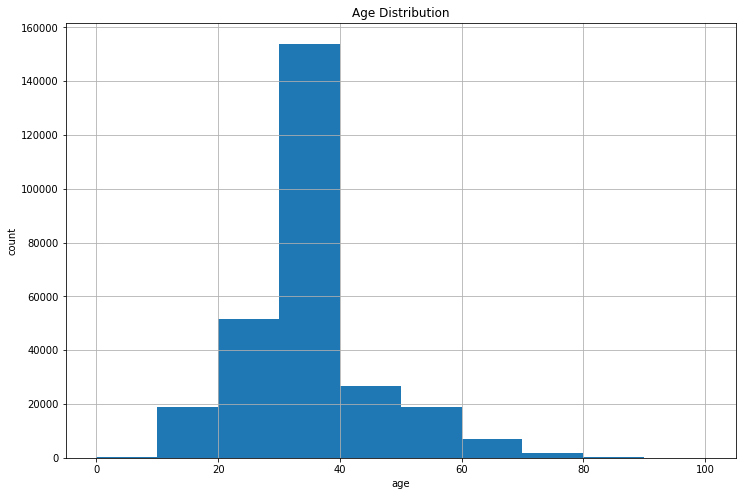

In [ ]:
#Plot histogram to see the distribution of the data
fig = plt.figure(figsize = (12,8))
user_df.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

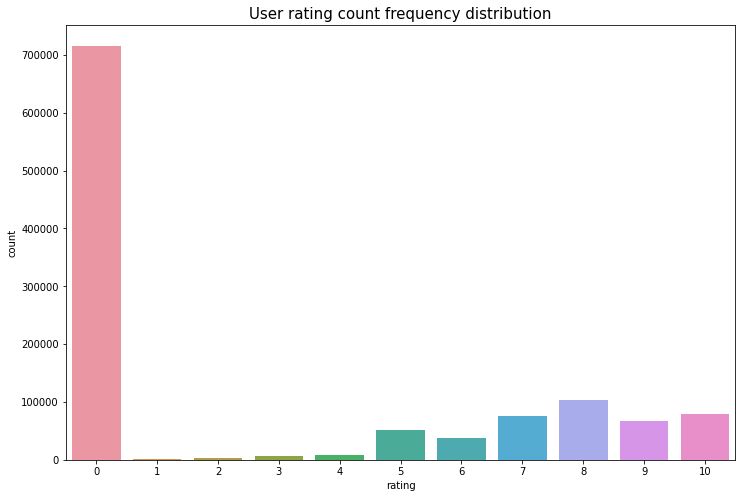

In [ ]:
# Plotting count of rating to see how it's distributed
fig = plt.figure(figsize = (12,8))
sns.countplot(x='rating',data=rating_df)
plt.title("User rating count frequency distribution", fontsize =15)
plt.show()

In [ ]:
'''
Since, the most frequent rating was 0 which might indicate that the user haven't rated the book. This may mislead the result.
Hence, we will separate the 0 rated data exclusively for better understanding of the most common user rating.

ratings_explicit = ratings excluding the 0 rating
'''

# Separating ratings
ratings_explicit= unique_ratings[unique_ratings['rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['rating'] == 0]

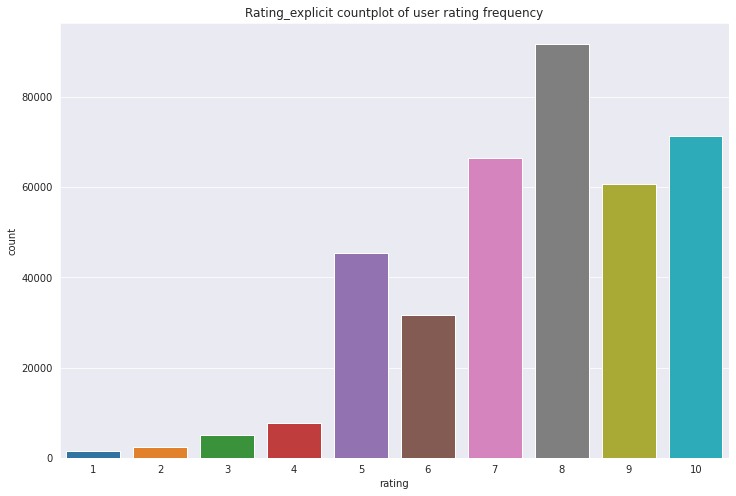

In [ ]:
# Now plotting countplot of rating_explicit
fig = plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='rating')
plt.title("Rating_explicit countplot of user rating frequency")
plt.show()

In [ ]:
# Merging ratings_explicit with books dataset on ISBNs feature
new_book= pd.merge(book_df, ratings_explicit, on='ISBN')
new_book.head()

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [ ]:
# Grouping group data based on title and aggregate based on rating
top_ten_books= pd.DataFrame(new_book.groupby('title')['rating'].count().sort_values(ascending=False).head(10).reset_index())

In [ ]:
# Printing top ten books 
print('The top ten books recommendations are :')
top_ten_books

The top ten books recommendations are :


,title,rating
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,377
7,A Painted House,366
8,Life of Pi,336
9,Harry Potter and the Chamber of Secrets (Book 2),326


In [ ]:
#our analysis ready dataset
new_book

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9
...,...,...,...,...,...,...,...
383834,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,275318,10
383835,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,275970,7
383836,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,276313,5
383837,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),276463,7


In [ ]:
#Users with more than 200 ratings 
numbers1 = ratings_explicit['user_id'].value_counts()
ratings = ratings_explicit[ratings_explicit['user_id'].isin(numbers1[numbers1 >= 200].index)]

#Books with more than 100 Ratings
number2 = ratings_explicit['rating'].value_counts()
ratings = ratings_explicit[ratings_explicit['rating'].isin(number2[number2 >= 100].index)]

The dataset 'Ratings' and 'Books' have common column 'ISBN' so create new dataframe merging the two dataframes

In [ ]:
#Merging the dataset ratings and Books
books_with_rating = pd.merge(rating_df, book_df, on='ISBN')

#books_with_rating.drop(books_with_rating.filter(regex='_y$').columns, axis=1, inplace=True)
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
